## PIL/Pillow 基礎
Pillowは、開発が停止しているPIL(Python Image Library)からフォークされた画像処理ライブラリです。<br>
OpenCVのように高度な画像処理（顔検出など）はできませんが、リサイズ（拡大・縮小）、画像の合成、図形描画などの処理は手軽にできます。
Tkinterのキャンバスで扱える画像ファイルは bmp,gifなど限られていますが、Pillowを使うと様々なフォーマットの画像をTkinterの画像フォーマットに変換することができます。
PILをインポートするとPillowライブラリになっていますが、このまま利用します。


In [1]:
import PIL
print(PIL.__doc__)
print("Version:",PIL.__version__)

Pillow (Fork of the Python Imaging Library)

Pillow is the friendly PIL fork by Alex Clark and Contributors.
    https://github.com/python-pillow/Pillow/

Pillow is forked from PIL 1.1.7.

PIL is the Python Imaging Library by Fredrik Lundh and Contributors.
Copyright (c) 1999 by Secret Labs AB.

Use PIL.__version__ for this Pillow version.

;-)

Version: 9.4.0


### 画像読み込み、処理、保存

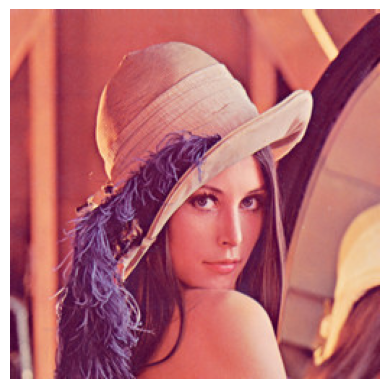

In [2]:
%matplotlib inline
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt

img = Image.open("data/Lenna.jpg")
plt.axis("off")
plt.imshow(img)

plt.show()

画像のフォーマット、サイズ（幅, 高さ）、モードなどのメタ情報を取得できます。

In [3]:
print(img.format, img.size, img.mode)

JPEG (256, 256) RGB


RGB各色の最小値と最大値を取得することができます。

In [4]:
print(img.getextrema())

((48, 255), (0, 248), (26, 231))


指定した座標の色を取得できます。座標の原点(0, 0)は左上。(R, G, B)のタプルが返されます。

In [5]:
print(img.getpixel((255, 255)))

(182, 69, 75)


画像を処理する例です。<br>
・白黒変換<br>
・回転<br>
・ガウシアンブラー（ぼかし）<br>

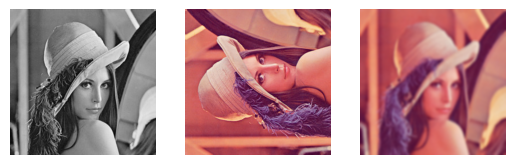

In [6]:
# グレースケールに変換
gray_img = img.convert('L')
plt.subplot(131)
plt.axis("off")
plt.imshow(gray_img, cmap=plt.cm.gray)

# 90°回転
rotate_img = img.rotate(90)
plt.subplot(132)
plt.axis("off")
plt.imshow(rotate_img)

# ガウシアンブラー（ぼかし）
gus_img = img.filter(ImageFilter.GaussianBlur())
plt.subplot(133)
plt.axis("off")
plt.imshow(gus_img)

plt.show()

画像を保存は save() メソッドで行います。

In [8]:
gray_img.save("data/LennaGray.jpg",  quality=95)

保存されるファイルのフォーマットはsave()の引数に指定したファイル名の拡張子から自動的に判定されます。<br>
フォーマットに応じたパラメータも指定できます。たとえば、jpg の場合は キーワード引数 quility に1から100までの範囲で品質を指定できます。
値が大きいほうが品質が良くなりますが、その分ファイルサイズも大きくなります。公式ドキュメントでは95以上は推奨されていません。
劣化を防ぎたい場合は可逆性圧縮の png などで保存しましょう。

### 画像のリサイズ

画像のサイズ変更はresize()メソッドで行います。サイズはsize=(幅, 高さ)で指定します。単位はピクセルです。


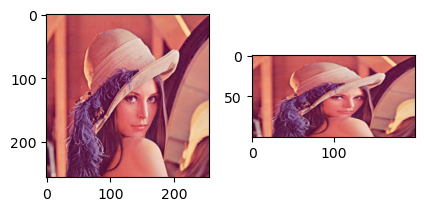

In [11]:
%matplotlib inline
from PIL import Image
from matplotlib import pyplot as plt

img = Image.open('data/Lenna.jpg')

# 256x256ピクセルの画像
plt.subplot(131)
plt.imshow(img)

# 200x100ピクセルにリサイズ
plt.subplot(132)
img_resize = img.resize(size=(200, 100))
plt.imshow(img_resize)

# 画像間に余裕をもたせて描画
plt.tight_layout()
plt.show()

## 図形の描画
図形描画は ImageDraw モジュールを使います。<br>
Image.new()でベタ塗り画像（キャンバス）Imageオブジェクトを作成します。第一引数にモード、第二引数にサイズ、第三引数にRGBの各色を指定します。

In [12]:
%matplotlib inline
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

img = Image.new('RGB', (200, 200), (192, 192, 192))
draw = ImageDraw.Draw(img)

ImageDraw.Draw()オブジェクトで楕円、矩形、直線、多角形を描画します。

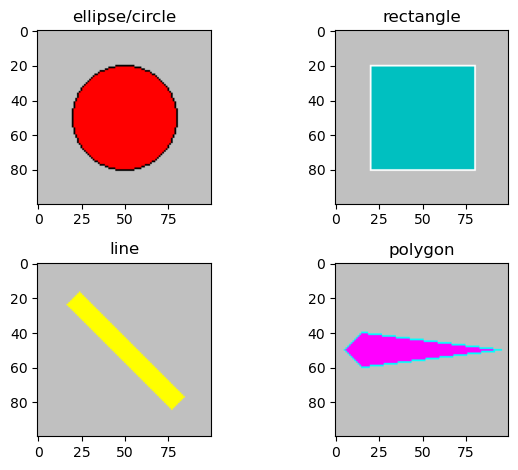

In [13]:
%matplotlib inline
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

# 楕円描画（正方形に描画すると円になる）
img = Image.new('RGB', (100, 100), (192, 192, 192))
draw = ImageDraw.Draw(img)
draw.ellipse((20, 20, 80, 80), fill=(255, 0, 0), outline=(0, 0, 0))
plt.subplot(221)
plt.imshow(img)
plt.title('ellipse/circle')

# 矩形描画
img = Image.new('RGB', (100, 100), (192, 192, 192))
draw = ImageDraw.Draw(img)
draw.rectangle((20, 20, 80, 80), fill=(0, 192, 192), outline=(255, 255, 255))
plt.subplot(222)
plt.imshow(img)
plt.title('rectangle')

# 直線描画
img = Image.new('RGB', (100, 100), (192, 192, 192))
draw = ImageDraw.Draw(img)
draw.line((20, 20, 80, 80), fill=(255, 255, 0), width=10)
plt.subplot(223)
plt.imshow(img)
plt.title('line')

# 多角形（ポロゴン）描画
img = Image.new('RGB', (100, 100), (192, 192, 192))
draw = ImageDraw.Draw(img)
draw.polygon((5, 50)+(15, 40)+(95,50)+(15,60), fill=(255, 0, 255), outline=(0, 255, 255))
plt.subplot(224)
plt.imshow(img)
plt.title('polygon')

# 画像間に余裕をもたせて描画
plt.tight_layout()

# 描画した内容を画面表示
plt.show()